Processing file: ./Inputs/9914TT106A.PV.csvProcessing file: ./Inputs/9911LIA027.PV.csv

Processing file: ./Inputs/7951_TV021A.OUT.csv
Processing file: ./Inputs/9911PDIA057.PV.csv
Processing file: ./Inputs/214_LZA306A.PNT.csv
Processing file: ./Inputs/9914LISA032.PV.csv
Processing file: ./Inputs/9914LICA070.PV.csv
Processing file: ./Inputs/524_LIZA028C.PNT.csv
Processing file: ./Inputs/9911PI031.PV.csv
Processing file: ./Inputs/8911LZA004A.PNT.csv
Processing file: ./Inputs/9911TICA033.PV.csv
Processing file: ./Inputs/7913_TIA011.PNT.csv
Processing file: ./Inputs/8915_TIA021.PNT.csv
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Anomalies in file ./Inputs/9914LICA070.PV.c

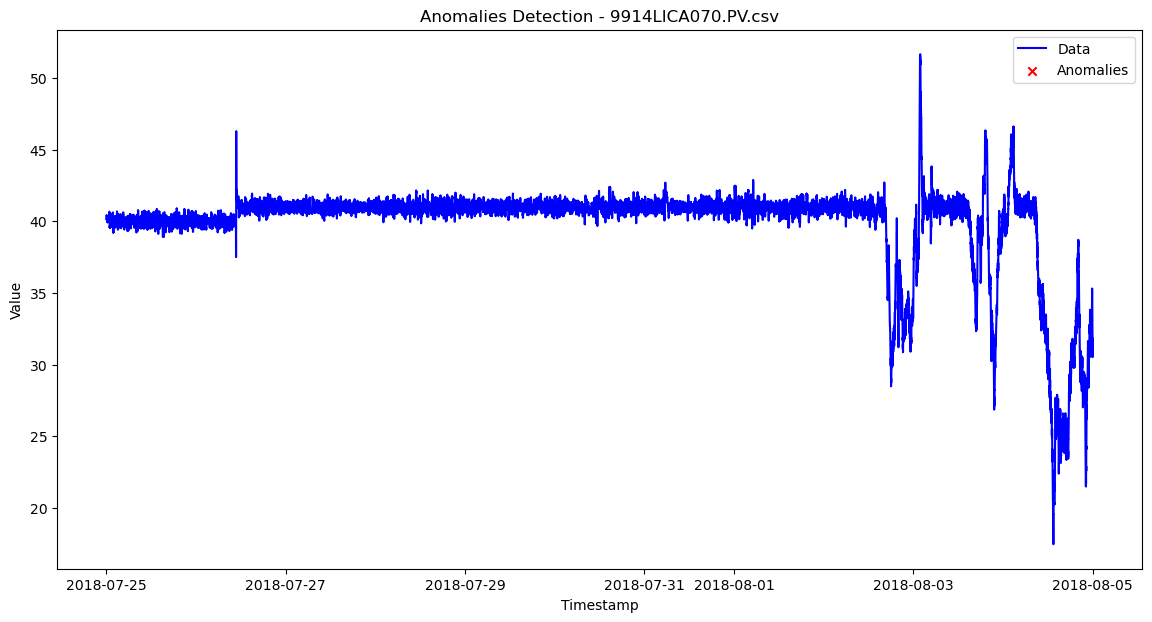

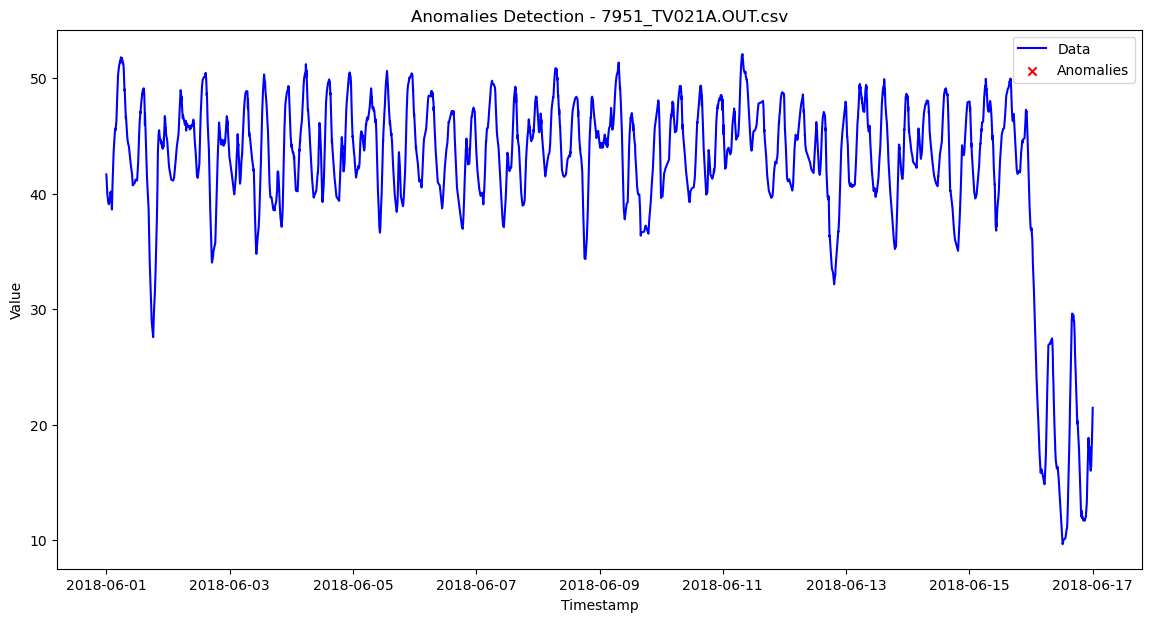

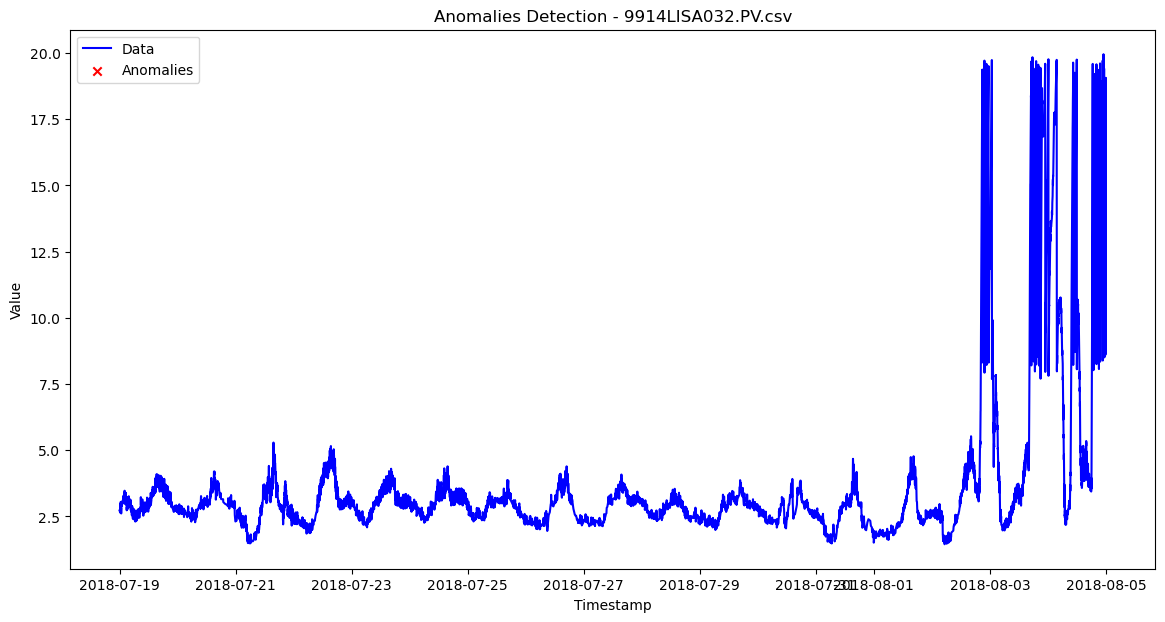

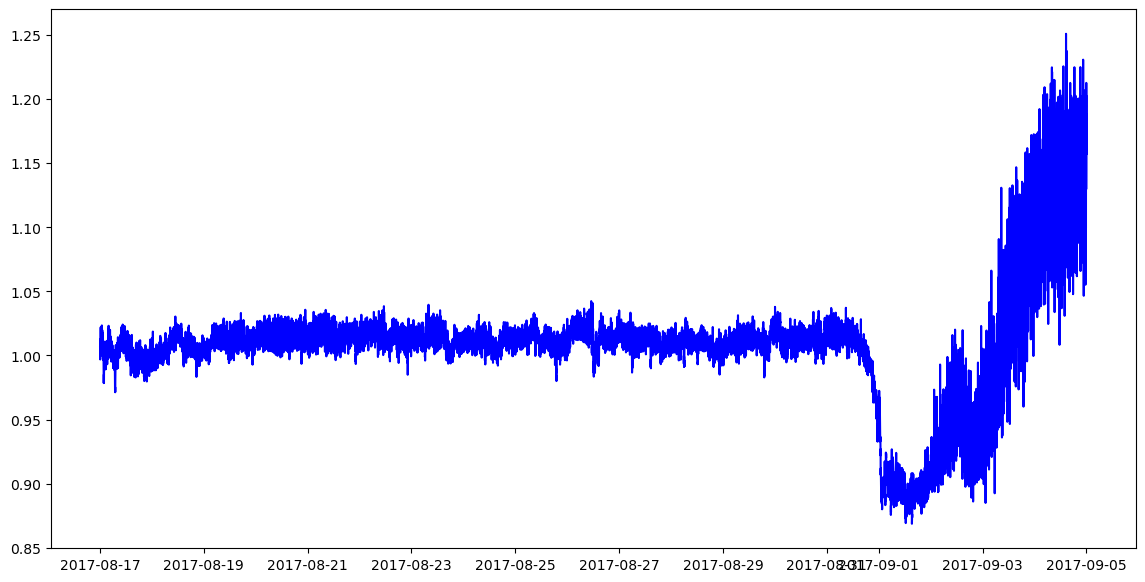

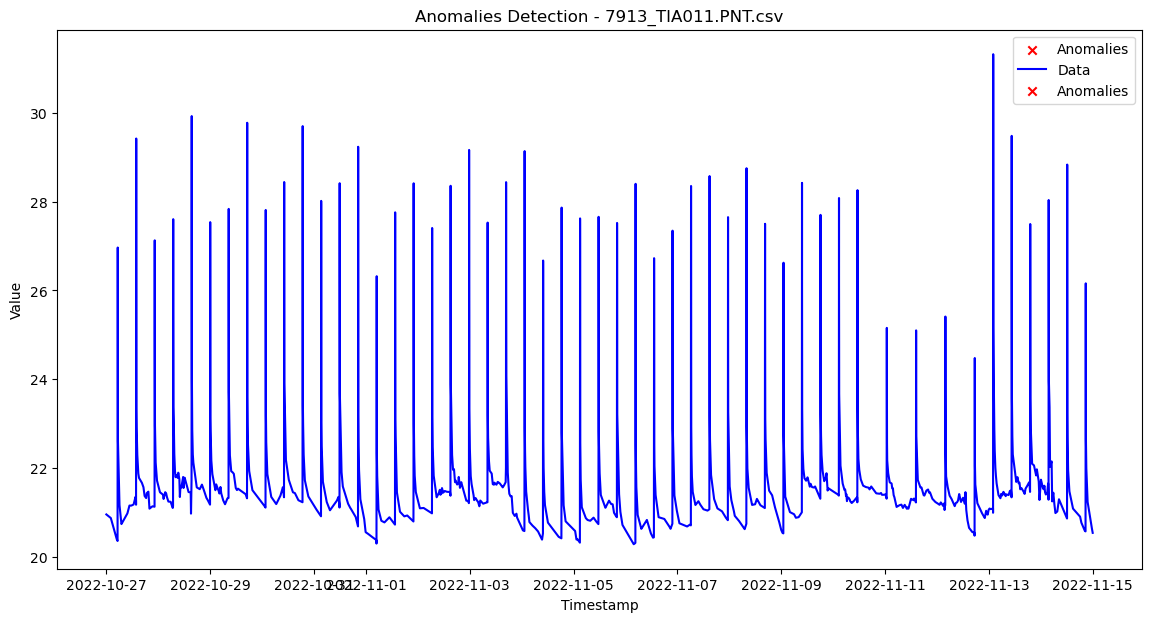

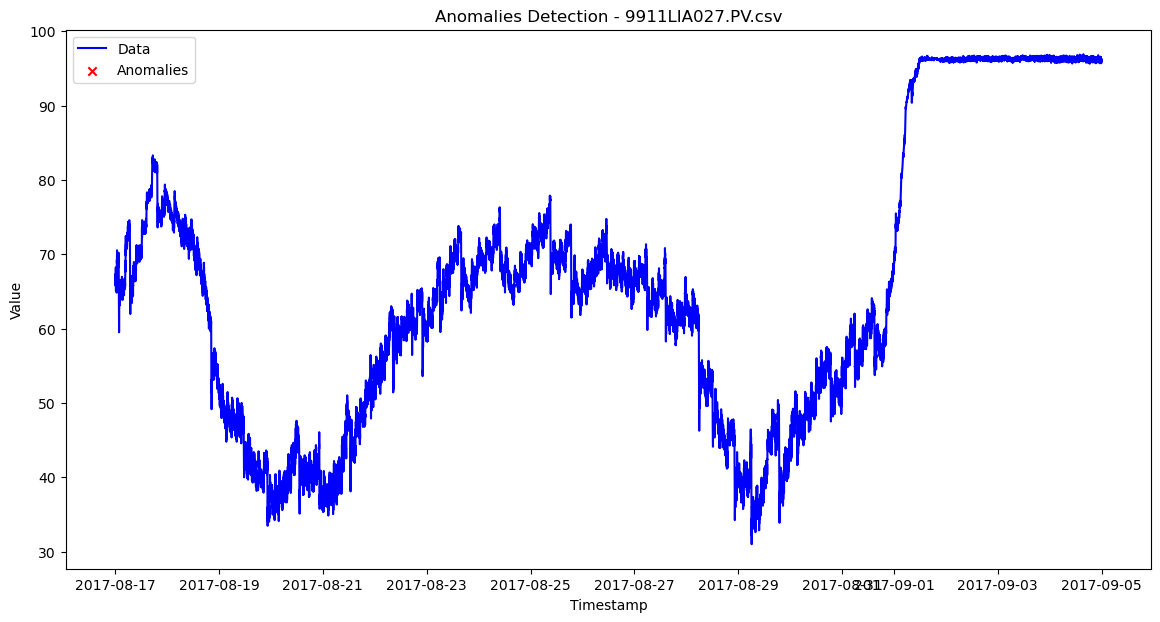

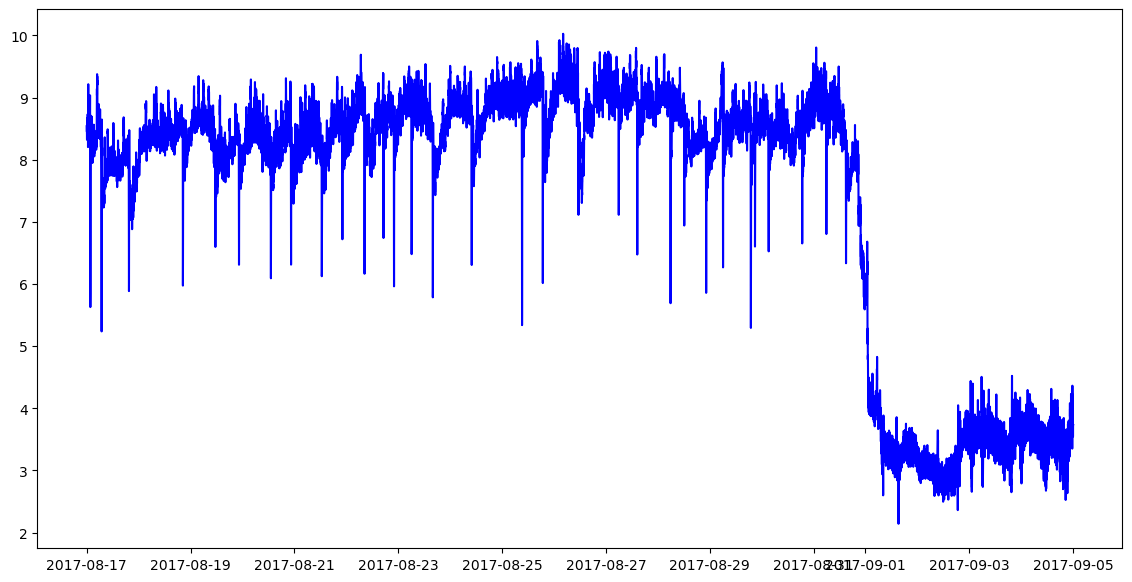

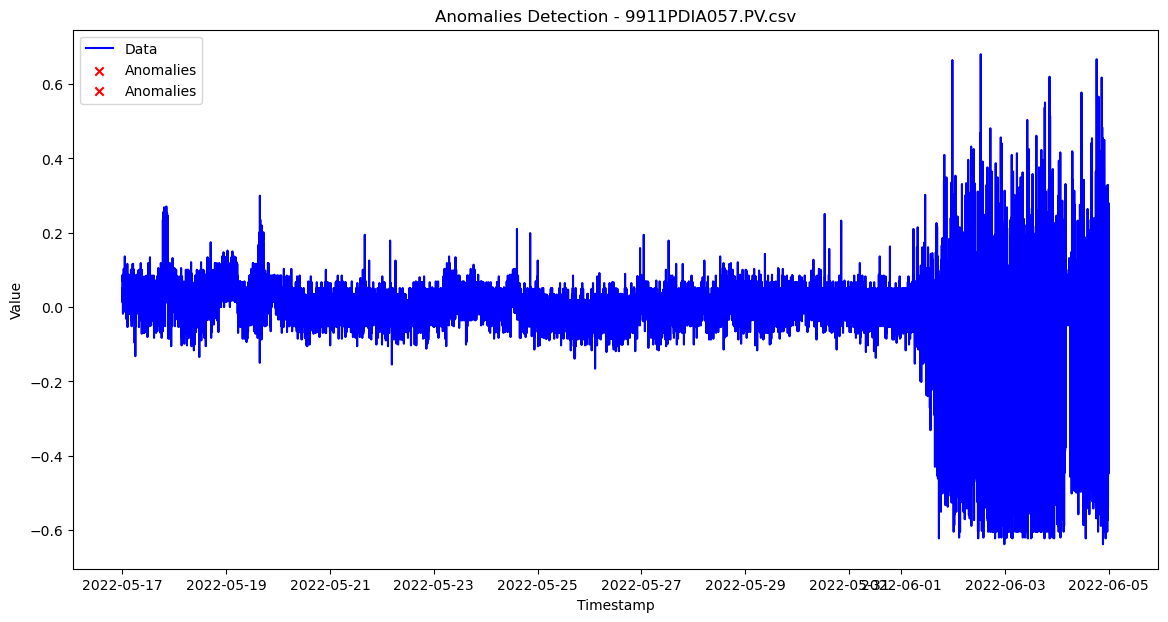

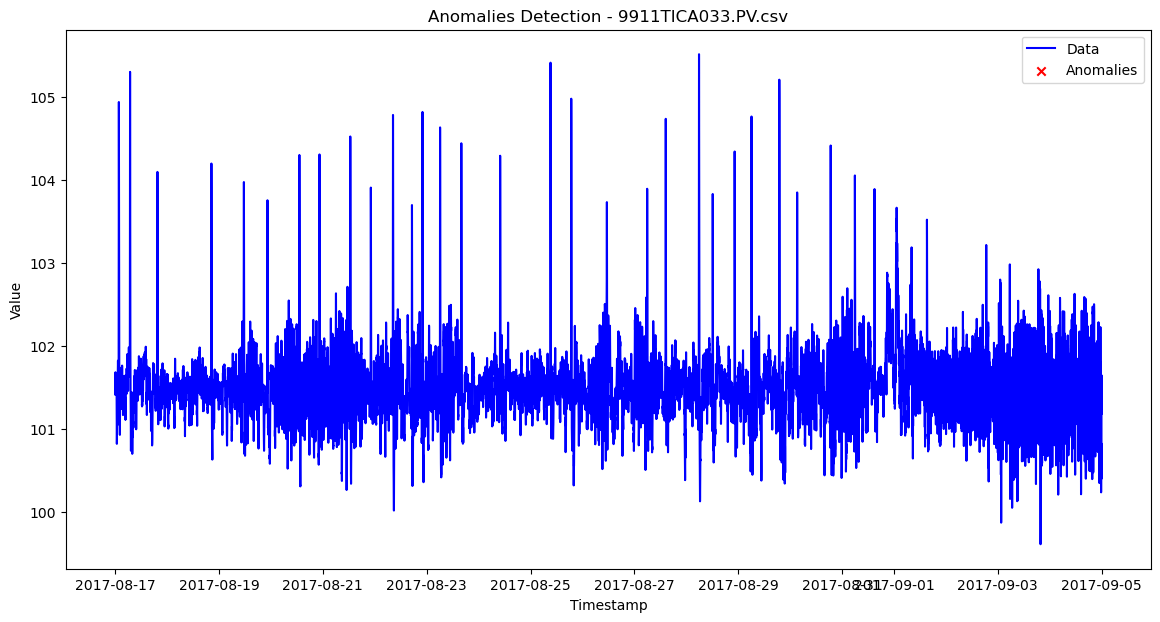

In [3]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# import os
# from concurrent.futures import ThreadPoolExecutor

# # Load the saved model for future inference
# autoencoder_loaded = tf.keras.models.load_model('autoencoder_model.h5', compile=False)

# # Manually compile the model (if needed for inference)
# autoencoder_loaded.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# # Directory containing multiple CSV files
# directory = './Inputs/'  

# # Set a threshold for anomaly detection
# threshold = 90


# def parse_timestamp_column(data):
#     """Function to parse 'Timestamp' column with two different formats."""
#     try:
#         # First attempt with format '%d/%m/%Y %H:%M'
#         data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
#         print("Parsed with format '%d/%m/%Y %H:%M'")
#     except ValueError:
#         try:
#             # If the first format fails, attempt with format '%d-%b-%y %H:%M:%S'
#             data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%b-%y %H:%M:%S')
#             print("Parsed with format '%d-%b-%y %H:%M:%S'")
#         except ValueError:
#             # Handle the case where both formats fail
#             print("Timestamp parsing failed for both formats.")
#             raise




# def preprocess_file(file_path):
#     """Function to load and preprocess a single CSV file."""
#     data = pd.read_csv(file_path)
#     data.columns = ['Timestamp', 'Value']
#     data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
#     data.set_index('Timestamp', inplace=True)
    
#     # Normalize the data
#     scaler = MinMaxScaler()
#     data['Value_scaled'] = scaler.fit_transform(data[['Value']])
    
#     X = data['Value_scaled'].values.reshape(-1, 1)
#     return data, X, scaler

# def detect_anomalies(X, threshold):
#     """Function to detect anomalies using the loaded model."""
#     # Use the loaded model for inference (reconstruction)
#     reconstructed_data = autoencoder_loaded.predict(X)
    
#     # Calculate reconstruction error
#     reconstruction_error = tf.keras.losses.mse(X, reconstructed_data).numpy()
    
#     # If threshold not set, determine using 95th percentile (set for first file)
#     if threshold is None:
#         return np.percentile(reconstruction_error, 95), None, None
    
#     # Detect anomalies using the defined threshold
#     anomalies = reconstruction_error > threshold
#     return reconstruction_error, anomalies

# def plot_anomalies(data, anomaly_indices, title):
#     """Function to plot the original data and anomalies."""
#     anomaly_values = data.iloc[anomaly_indices]['Value']
    
#     # Plot the data and anomalies
#     plt.figure(figsize=(14, 7))
#     plt.plot(data.index, data['Value'], label='Data', color='blue')
#     plt.scatter(data.iloc[anomaly_indices].index, anomaly_values, color='red', label='Anomalies', marker='x')
    
#     # Add labels and title
#     plt.title(f'Anomalies Detection - {title}')
#     plt.xlabel('Timestamp')
#     plt.ylabel('Value')
#     plt.legend()
#     time.sleep(2)
#     # Show the plot
#     plt.show()

# def process_file(file_path):
#     """Process a single file: load, preprocess, detect anomalies, and plot."""
#     global threshold
#     print(f"Processing file: {file_path}")
    
#     # Preprocess the file
#     data, X, scaler = preprocess_file(file_path)
    
#     # Detect anomalies and update threshold if necessary
#     if threshold is None:
#         threshold, _, _ = detect_anomalies(X, threshold)
#         print(f"Threshold for anomaly detection set to: {threshold}")
    
#     # Perform anomaly detection
#     _, anomalies = detect_anomalies(X, threshold)
    
#     # Get indices of anomalies
#     anomaly_indices = np.where(anomalies)[0]
    
#     # Print anomaly values and indices
#     print(f"Anomalies in file {file_path}:")
#     print(f"Anomaly Indices: {anomaly_indices}")
#     print(f"Anomaly Values: {data.iloc[anomaly_indices]['Value'].values}")
    
#     # Plot the anomalies
#     plot_anomalies(data, anomaly_indices, os.path.basename(file_path))

# # List all CSV files in the directory
# csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

# # Use ThreadPoolExecutor to process files in parallel
# with ThreadPoolExecutor() as executor:
#     executor.map(process_file, csv_files)


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
from concurrent.futures import ThreadPoolExecutor
import time

# Load the saved model for future inference
autoencoder_loaded = tf.keras.models.load_model('autoencoder_model.h5', compile=False)

# Manually compile the model (if needed for inference)
autoencoder_loaded.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# Directory containing multiple CSV files
directory = './Inputs/'  

# Set a threshold for anomaly detection
threshold = 90

def parse_timestamp_column(data):
    """Function to parse 'Timestamp' column with two different formats."""
    try:
        # First attempt with format '%d/%m/%Y %H:%M'
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
        print("Parsed with format '%d/%m/%Y %H:%M'")
    except ValueError:
        try:
            # If the first format fails, attempt with format '%d-%b-%y %H:%M:%S'
            data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%b-%y %H:%M:%S')
            print("Parsed with format '%d-%b-%y %H:%M:%S'")
        except ValueError:
            # Handle the case where both formats fail
            print("Timestamp parsing failed for both formats.")
            raise

def preprocess_file(file_path):
    """Function to load and preprocess a single CSV file."""
    data = pd.read_csv(file_path)
    data.columns = ['Timestamp', 'Value']
    
    # Parse the timestamp column using the helper function
    parse_timestamp_column(data)
    
    # Set the timestamp as the index
    data.set_index('Timestamp', inplace=True)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data['Value_scaled'] = scaler.fit_transform(data[['Value']])
    
    X = data['Value_scaled'].values.reshape(-1, 1)
    return data, X, scaler

def detect_anomalies(X, threshold):
    """Function to detect anomalies using the loaded model."""
    # Use the loaded model for inference (reconstruction)
    reconstructed_data = autoencoder_loaded.predict(X)
    
    # Calculate reconstruction error
    reconstruction_error = tf.keras.losses.mse(X, reconstructed_data).numpy()
    
    # If threshold not set, determine using 95th percentile (set for first file)
    if threshold is None:
        return np.percentile(reconstruction_error, 95), None, None
    
    # Detect anomalies using the defined threshold
    anomalies = reconstruction_error > threshold
    return reconstruction_error, anomalies

def plot_anomalies(data, anomaly_indices, title):
    """Function to plot the original data and anomalies."""
    anomaly_values = data.iloc[anomaly_indices]['Value']
    
    # Plot the data and anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Value'], label='Data', color='blue')
    plt.scatter(data.iloc[anomaly_indices].index, anomaly_values, color='red', label='Anomalies', marker='x')
    
    # Add labels and title
    plt.title(f'Anomalies Detection - {title}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    time.sleep(2)
    # Show the plot
    plt.show()

def process_file(file_path):
    """Process a single file: load, preprocess, detect anomalies, and plot."""
    global threshold  # Ensure to use the global threshold
    print(f"Processing file: {file_path}")
    
    # Preprocess the file
    data, X, scaler = preprocess_file(file_path)
    
    # Check the shape of X and the data
    print(f"Data shape: {data.shape}, X shape: {X.shape}")

    # Detect anomalies and update threshold if necessary
    if threshold is None:
        # Set the threshold based on the first file processed
        threshold, _, _ = detect_anomalies(X, threshold)
        print(f"Threshold for anomaly detection set to: {threshold}")
    
    # Perform anomaly detection
    reconstruction_error, anomalies = detect_anomalies(X, threshold)
    
    # Get indices of anomalies
    anomaly_indices = np.where(anomalies)[0]

    # Debug output to check for anomalies
    print(f"Reconstruction Error: {reconstruction_error}")
    print(f"Anomalies detected: {np.sum(anomalies)}")
    
    # Print anomaly values and indices
    print(f"Anomaly Indices: {anomaly_indices}")
    if len(anomaly_indices) > 0:
        print(f"Anomaly Values: {data.iloc[anomaly_indices]['Value'].values}")
    else:
        print("No anomalies detected in this file.")

    # Plot the anomalies if any are detected
    if len(anomaly_indices) > 0:
        plot_anomalies(data, anomaly_indices, os.path.basename(file_path))
    else:
        print(f"No anomalies to plot for file {file_path}.")


# List all CSV files in the directory
csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

# Number of CSV files (this will be the number of threads)
num_threads = len(csv_files)

# Use ThreadPoolExecutor to process files in parallel with dynamic threads
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    executor.map(process_file, csv_files)


Processing file: ./Inputs/9914TT106A.PV.csvProcessing file: ./Inputs/9911LIA027.PV.csv

Processing file: ./Inputs/7951_TV021A.OUT.csv
Processing file: ./Inputs/9911PDIA057.PV.csv
Processing file: ./Inputs/214_LZA306A.PNT.csv
Processing file: ./Inputs/9914LISA032.PV.csv
Processing file: ./Inputs/9914LICA070.PV.csv
Processing file: ./Inputs/524_LIZA028C.PNT.csv
Processing file: ./Inputs/9911PI031.PV.csv
Processing file: ./Inputs/8911LZA004A.PNT.csv
Processing file: ./Inputs/9911TICA033.PV.csv
Processing file: ./Inputs/7913_TIA011.PNT.csv
Processing file: ./Inputs/8915_TIA021.PNT.csv
Parsed with format '%d/%m/%Y %H:%M'
Parsed with format '%d/%m/%Y %H:%M'Parsed with format '%d/%m/%Y %H:%M'
Parsed with format '%d/%m/%Y %H:%M'

Parsed with format '%d/%m/%Y %H:%M'
Parsed with format '%d/%m/%Y %H:%M'
Parsed with format '%d-%b-%y %H:%M:%S'
Parsed with format '%d-%b-%y %H:%M:%S'
Parsed with format '%d/%m/%Y %H:%M'
Data shape: (27360, 2), X shape: (27360, 1)
Data shape: (24480, 2), X shape: (2448